In [ ]:
pip install contractions

In [ ]:
pip install wandb

In [ ]:
!pip install -U spacy==3.1

In [1]:
import spacy
import pandas as pd
import numpy as np
import spacy.cli
import seaborn as sns

import nltk
import string
import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [2]:
#Import modified dataset

dfin = pd.read_csv("dfin.csv", index_col=False,
                 low_memory=False)

In [3]:
from IPython.display import display
display(dfin)

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,Ambience_intimate,Ambience_trendy,Ambience_upscale,Ambience_classy,Ambience_casual,BP_garage,BP_street,BP_validated,BP_lot,BP_valet
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,...,False,True,False,True,False,False,False,False,True,False
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,...,False,False,False,True,True,False,False,False,False,True
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,...,False,False,False,False,True,False,False,False,True,False
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,...,False,False,False,False,False,False,False,False,True,False
4,4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,...,False,False,False,True,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214869,214869,Mc6gBUoqj8VNyGHBOTIPCw,_XXa8CyI4uKOdu6RRbWE4g,cs6HfZNykLVitm09jWFqWg,4,5,3,4,I went here for brunch with 2 friends on a Sun...,2018-04-17 00:28:02,...,False,False,False,True,True,False,True,False,False,True
214870,214870,jDMk2EEGG-fkuA2rnCr0zg,KTgetFhipsOG1vWfVuSaiA,cs6HfZNykLVitm09jWFqWg,5,0,0,0,Our group shared dinner entrees and side dishe...,2017-10-13 21:02:12,...,False,False,False,True,True,False,True,False,False,True
214871,214871,MbmrN5q_JKkokjOdqLXxhQ,SF2Hu55kX9QJDvZETuZ9eg,uXOVFQraz1va1TrtgiqYTg,4,0,0,0,This was a fun place to dine. It is a one chef...,2016-10-31 20:47:16,...,False,False,False,True,True,False,True,False,False,False
214872,214872,2n2PbNLYlQSRs88VrZtrGg,_BwuIa1-qjIL1PdYB_awyA,Gzo1G_mMc2kpduvK2yQFYg,2,0,0,0,The food was ok. I order the pork bites and it...,2015-07-21 13:21:59,...,False,False,False,True,True,False,False,False,True,False


In [4]:
#Remove contractions

dfin['text_upr'] = dfin['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
dfin.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,Ambience_trendy,Ambience_upscale,Ambience_classy,Ambience_casual,BP_garage,BP_street,BP_validated,BP_lot,BP_valet,text_upr
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,...,True,False,True,False,False,False,False,True,False,"[I, have, been, here, twice, and, have, had, r..."
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,...,False,False,True,True,False,False,False,False,True,"[Quickly, stopped, in, for, a, UFC, fight., I,..."
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,...,False,False,False,True,False,False,False,True,False,"[I, think, their, rice, dishes, are, way, bett..."
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,...,False,False,False,False,False,False,False,True,False,"[When, we, first, arrived, at, the, Coco, Key,..."
4,4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,...,False,False,True,True,False,True,False,True,False,"[3.5, stars!, I, got, the, avocado, margarita,..."


In [5]:
#Text without contractions to a string 

dfin['text_upr_str'] = [' '.join(map(str, l)) for l in dfin['text_upr']]
dfin.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,Ambience_upscale,Ambience_classy,Ambience_casual,BP_garage,BP_street,BP_validated,BP_lot,BP_valet,text_upr,text_upr_str
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,...,False,True,False,False,False,False,True,False,"[I, have, been, here, twice, and, have, had, r...",I have been here twice and have had really goo...
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,...,False,True,True,False,False,False,False,True,"[Quickly, stopped, in, for, a, UFC, fight., I,...",Quickly stopped in for a UFC fight. I sat down...
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,...,False,False,True,False,False,False,True,False,"[I, think, their, rice, dishes, are, way, bett...",I think their rice dishes are way better than ...
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,...,False,False,False,False,False,False,True,False,"[When, we, first, arrived, at, the, Coco, Key,...","When we first arrived at the Coco Key, we were..."
4,4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,...,False,True,True,False,True,False,True,False,"[3.5, stars!, I, got, the, avocado, margarita,...",3.5 stars! I got the avocado margarita and it ...


In [6]:
#Tokenization

dfin['tokenized'] = dfin['text_upr_str'].apply(word_tokenize)
dfin.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,Ambience_classy,Ambience_casual,BP_garage,BP_street,BP_validated,BP_lot,BP_valet,text_upr,text_upr_str,tokenized
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,...,True,False,False,False,False,True,False,"[I, have, been, here, twice, and, have, had, r...",I have been here twice and have had really goo...,"[I, have, been, here, twice, and, have, had, r..."
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,...,True,True,False,False,False,False,True,"[Quickly, stopped, in, for, a, UFC, fight., I,...",Quickly stopped in for a UFC fight. I sat down...,"[Quickly, stopped, in, for, a, UFC, fight, ., ..."
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,...,False,True,False,False,False,True,False,"[I, think, their, rice, dishes, are, way, bett...",I think their rice dishes are way better than ...,"[I, think, their, rice, dishes, are, way, bett..."
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,...,False,False,False,False,False,True,False,"[When, we, first, arrived, at, the, Coco, Key,...","When we first arrived at the Coco Key, we were...","[When, we, first, arrived, at, the, Coco, Key,..."
4,4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,...,True,True,False,True,False,True,False,"[3.5, stars!, I, got, the, avocado, margarita,...",3.5 stars! I got the avocado margarita and it ...,"[3.5, stars, !, I, got, the, avocado, margarit..."


In [7]:
#Remove capital letters

dfin['lower'] = dfin['tokenized'].apply(lambda x: [word.lower() for word in x])
dfin.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,Ambience_casual,BP_garage,BP_street,BP_validated,BP_lot,BP_valet,text_upr,text_upr_str,tokenized,lower
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,...,False,False,False,False,True,False,"[I, have, been, here, twice, and, have, had, r...",I have been here twice and have had really goo...,"[I, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r..."
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,...,True,False,False,False,False,True,"[Quickly, stopped, in, for, a, UFC, fight., I,...",Quickly stopped in for a UFC fight. I sat down...,"[Quickly, stopped, in, for, a, UFC, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, ., ..."
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,...,True,False,False,False,True,False,"[I, think, their, rice, dishes, are, way, bett...",I think their rice dishes are way better than ...,"[I, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett..."
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,...,False,False,False,False,True,False,"[When, we, first, arrived, at, the, Coco, Key,...","When we first arrived at the Coco Key, we were...","[When, we, first, arrived, at, the, Coco, Key,...","[when, we, first, arrived, at, the, coco, key,..."
4,4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,...,True,False,True,False,True,False,"[3.5, stars!, I, got, the, avocado, margarita,...",3.5 stars! I got the avocado margarita and it ...,"[3.5, stars, !, I, got, the, avocado, margarit...","[3.5, stars, !, i, got, the, avocado, margarit..."


In [8]:
#Remove interpunction

punc = string.punctuation
dfin['no_punc'] = dfin['lower'].apply(lambda x: [word for word in x if word not in punc])
dfin.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,BP_garage,BP_street,BP_validated,BP_lot,BP_valet,text_upr,text_upr_str,tokenized,lower,no_punc
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,...,False,False,False,True,False,"[I, have, been, here, twice, and, have, had, r...",I have been here twice and have had really goo...,"[I, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r..."
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,...,False,False,False,False,True,"[Quickly, stopped, in, for, a, UFC, fight., I,...",Quickly stopped in for a UFC fight. I sat down...,"[Quickly, stopped, in, for, a, UFC, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, i, ..."
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,...,False,False,False,True,False,"[I, think, their, rice, dishes, are, way, bett...",I think their rice dishes are way better than ...,"[I, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett..."
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,...,False,False,False,True,False,"[When, we, first, arrived, at, the, Coco, Key,...","When we first arrived at the Coco Key, we were...","[When, we, first, arrived, at, the, Coco, Key,...","[when, we, first, arrived, at, the, coco, key,...","[when, we, first, arrived, at, the, coco, key,..."
4,4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,...,False,True,False,True,False,"[3.5, stars!, I, got, the, avocado, margarita,...",3.5 stars! I got the avocado margarita and it ...,"[3.5, stars, !, I, got, the, avocado, margarit...","[3.5, stars, !, i, got, the, avocado, margarit...","[3.5, stars, i, got, the, avocado, margarita, ..."


In [9]:
#Remove stopwords, which are selected for English language

stop_words = set(stopwords.words('english'))
dfin['stopwords_removed'] = dfin['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
dfin.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,BP_street,BP_validated,BP_lot,BP_valet,text_upr,text_upr_str,tokenized,lower,no_punc,stopwords_removed
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,...,False,False,True,False,"[I, have, been, here, twice, and, have, had, r...",I have been here twice and have had really goo...,"[I, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r...","[twice, really, good, food, service, times, go..."
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,...,False,False,False,True,"[Quickly, stopped, in, for, a, UFC, fight., I,...",Quickly stopped in for a UFC fight. I sat down...,"[Quickly, stopped, in, for, a, UFC, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, i, ...","[quickly, stopped, ufc, fight, sat, bar, boyfr..."
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,...,False,False,True,False,"[I, think, their, rice, dishes, are, way, bett...",I think their rice dishes are way better than ...,"[I, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett...","[think, rice, dishes, way, better, pho, 's, al..."
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,...,False,False,True,False,"[When, we, first, arrived, at, the, Coco, Key,...","When we first arrived at the Coco Key, we were...","[When, we, first, arrived, at, the, Coco, Key,...","[when, we, first, arrived, at, the, coco, key,...","[when, we, first, arrived, at, the, coco, key,...","[first, arrived, coco, key, greeted, number, s..."
4,4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,...,True,False,True,False,"[3.5, stars!, I, got, the, avocado, margarita,...",3.5 stars! I got the avocado margarita and it ...,"[3.5, stars, !, I, got, the, avocado, margarit...","[3.5, stars, !, i, got, the, avocado, margarit...","[3.5, stars, i, got, the, avocado, margarita, ...","[3.5, stars, got, avocado, margarita, deliciou..."


In [10]:
#Determine word types in the text

dfin['pos_tags'] = dfin['stopwords_removed'].apply(nltk.tag.pos_tag)
dfin.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,BP_validated,BP_lot,BP_valet,text_upr,text_upr_str,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,...,False,True,False,"[I, have, been, here, twice, and, have, had, r...",I have been here twice and have had really goo...,"[I, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r...","[twice, really, good, food, service, times, go...","[(twice, RB), (really, RB), (good, JJ), (food,..."
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,...,False,False,True,"[Quickly, stopped, in, for, a, UFC, fight., I,...",Quickly stopped in for a UFC fight. I sat down...,"[Quickly, stopped, in, for, a, UFC, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, i, ...","[quickly, stopped, ufc, fight, sat, bar, boyfr...","[(quickly, RB), (stopped, VBD), (ufc, JJ), (fi..."
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,...,False,True,False,"[I, think, their, rice, dishes, are, way, bett...",I think their rice dishes are way better than ...,"[I, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett...","[think, rice, dishes, way, better, pho, 's, al...","[(think, VB), (rice, NN), (dishes, NNS), (way,..."
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,...,False,True,False,"[When, we, first, arrived, at, the, Coco, Key,...","When we first arrived at the Coco Key, we were...","[When, we, first, arrived, at, the, Coco, Key,...","[when, we, first, arrived, at, the, coco, key,...","[when, we, first, arrived, at, the, coco, key,...","[first, arrived, coco, key, greeted, number, s...","[(first, RB), (arrived, VBN), (coco, NN), (key..."
4,4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,...,False,True,False,"[3.5, stars!, I, got, the, avocado, margarita,...",3.5 stars! I got the avocado margarita and it ...,"[3.5, stars, !, I, got, the, avocado, margarit...","[3.5, stars, !, i, got, the, avocado, margarit...","[3.5, stars, i, got, the, avocado, margarita, ...","[3.5, stars, got, avocado, margarita, deliciou...","[(3.5, CD), (stars, NNS), (got, VBD), (avocado..."


In [11]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
dfin['wordnet_pos'] = dfin['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
dfin.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,BP_lot,BP_valet,text_upr,text_upr_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,...,True,False,"[I, have, been, here, twice, and, have, had, r...",I have been here twice and have had really goo...,"[I, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r...","[twice, really, good, food, service, times, go...","[(twice, RB), (really, RB), (good, JJ), (food,...","[(twice, r), (really, r), (good, a), (food, n)..."
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,...,False,True,"[Quickly, stopped, in, for, a, UFC, fight., I,...",Quickly stopped in for a UFC fight. I sat down...,"[Quickly, stopped, in, for, a, UFC, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, i, ...","[quickly, stopped, ufc, fight, sat, bar, boyfr...","[(quickly, RB), (stopped, VBD), (ufc, JJ), (fi...","[(quickly, r), (stopped, v), (ufc, a), (fight,..."
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,...,True,False,"[I, think, their, rice, dishes, are, way, bett...",I think their rice dishes are way better than ...,"[I, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett...","[think, rice, dishes, way, better, pho, 's, al...","[(think, VB), (rice, NN), (dishes, NNS), (way,...","[(think, v), (rice, n), (dishes, n), (way, n),..."
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,...,True,False,"[When, we, first, arrived, at, the, Coco, Key,...","When we first arrived at the Coco Key, we were...","[When, we, first, arrived, at, the, Coco, Key,...","[when, we, first, arrived, at, the, coco, key,...","[when, we, first, arrived, at, the, coco, key,...","[first, arrived, coco, key, greeted, number, s...","[(first, RB), (arrived, VBN), (coco, NN), (key...","[(first, r), (arrived, v), (coco, n), (key, n)..."
4,4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,...,True,False,"[3.5, stars!, I, got, the, avocado, margarita,...",3.5 stars! I got the avocado margarita and it ...,"[3.5, stars, !, I, got, the, avocado, margarit...","[3.5, stars, !, i, got, the, avocado, margarit...","[3.5, stars, i, got, the, avocado, margarita, ...","[3.5, stars, got, avocado, margarita, deliciou...","[(3.5, CD), (stars, NNS), (got, VBD), (avocado...","[(3.5, n), (stars, n), (got, v), (avocado, a),..."


In [12]:
#Lemmatization

wnl = WordNetLemmatizer()
dfin['lemmatized'] = dfin['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
dfin.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,BP_valet,text_upr,text_upr_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,...,False,"[I, have, been, here, twice, and, have, had, r...",I have been here twice and have had really goo...,"[I, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r...","[twice, really, good, food, service, times, go...","[(twice, RB), (really, RB), (good, JJ), (food,...","[(twice, r), (really, r), (good, a), (food, n)...","[twice, really, good, food, service, time, get..."
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,...,True,"[Quickly, stopped, in, for, a, UFC, fight., I,...",Quickly stopped in for a UFC fight. I sat down...,"[Quickly, stopped, in, for, a, UFC, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, i, ...","[quickly, stopped, ufc, fight, sat, bar, boyfr...","[(quickly, RB), (stopped, VBD), (ufc, JJ), (fi...","[(quickly, r), (stopped, v), (ufc, a), (fight,...","[quickly, stop, ufc, fight, sit, bar, boyfrien..."
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,...,False,"[I, think, their, rice, dishes, are, way, bett...",I think their rice dishes are way better than ...,"[I, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett...","[think, rice, dishes, way, better, pho, 's, al...","[(think, VB), (rice, NN), (dishes, NNS), (way,...","[(think, v), (rice, n), (dishes, n), (way, n),...","[think, rice, dish, way, well, pho, 's, also, ..."
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,...,False,"[When, we, first, arrived, at, the, Coco, Key,...","When we first arrived at the Coco Key, we were...","[When, we, first, arrived, at, the, Coco, Key,...","[when, we, first, arrived, at, the, coco, key,...","[when, we, first, arrived, at, the, coco, key,...","[first, arrived, coco, key, greeted, number, s...","[(first, RB), (arrived, VBN), (coco, NN), (key...","[(first, r), (arrived, v), (coco, n), (key, n)...","[first, arrive, coco, key, greet, number, staf..."
4,4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,...,False,"[3.5, stars!, I, got, the, avocado, margarita,...",3.5 stars! I got the avocado margarita and it ...,"[3.5, stars, !, I, got, the, avocado, margarit...","[3.5, stars, !, i, got, the, avocado, margarit...","[3.5, stars, i, got, the, avocado, margarita, ...","[3.5, stars, got, avocado, margarita, deliciou...","[(3.5, CD), (stars, NNS), (got, VBD), (avocado...","[(3.5, n), (stars, n), (got, v), (avocado, a),...","[3.5, star, get, avocado, margarita, delicious..."


In [13]:
#Lemmatized text to a string

dfin['lemma_str'] = [' '.join(map(str,l)) for l in dfin['lemmatized']]
dfin.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,text_upr,text_upr_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,...,"[I, have, been, here, twice, and, have, had, r...",I have been here twice and have had really goo...,"[I, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r...","[twice, really, good, food, service, times, go...","[(twice, RB), (really, RB), (good, JJ), (food,...","[(twice, r), (really, r), (good, a), (food, n)...","[twice, really, good, food, service, time, get...",twice really good food service time get burger...
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,...,"[Quickly, stopped, in, for, a, UFC, fight., I,...",Quickly stopped in for a UFC fight. I sat down...,"[Quickly, stopped, in, for, a, UFC, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, i, ...","[quickly, stopped, ufc, fight, sat, bar, boyfr...","[(quickly, RB), (stopped, VBD), (ufc, JJ), (fi...","[(quickly, r), (stopped, v), (ufc, a), (fight,...","[quickly, stop, ufc, fight, sit, bar, boyfrien...",quickly stop ufc fight sit bar boyfriend park ...
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,...,"[I, think, their, rice, dishes, are, way, bett...",I think their rice dishes are way better than ...,"[I, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett...","[think, rice, dishes, way, better, pho, 's, al...","[(think, VB), (rice, NN), (dishes, NNS), (way,...","[(think, v), (rice, n), (dishes, n), (way, n),...","[think, rice, dish, way, well, pho, 's, also, ...",think rice dish way well pho 's also really li...
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,...,"[When, we, first, arrived, at, the, Coco, Key,...","When we first arrived at the Coco Key, we were...","[When, we, first, arrived, at, the, Coco, Key,...","[when, we, first, arrived, at, the, coco, key,...","[when, we, first, arrived, at, the, coco, key,...","[first, arrived, coco, key, greeted, number, s...","[(first, RB), (arrived, VBN), (coco, NN), (key...","[(first, r), (arrived, v), (coco, n), (key, n)...","[first, arrive, coco, key, greet, number, staf...",first arrive coco key greet number staff membe...
4,4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,...,"[3.5, stars!, I, got, the, avocado, margarita,...",3.5 stars! I got the avocado margarita and it ...,"[3.5, stars, !, I, got, the, avocado, margarit...","[3.5, stars, !, i, got, the, avocado, margarit...","[3.5, stars, i, got, the, avocado, margarita, ...","[3.5, stars, got, avocado, margarita, deliciou...","[(3.5, CD), (stars, NNS), (got, VBD), (avocado...","[(3.5, n), (stars, n), (got, v), (avocado, a),...","[3.5, star, get, avocado, margarita, delicious...",3.5 star get avocado margarita delicious custo...


In [14]:
#Sentiment analysis of text

from textblob import TextBlob

dfin['sentiment'] = dfin['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
dfin.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,text_upr_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,sentiment
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,...,I have been here twice and have had really goo...,"[I, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r...","[i, have, been, here, twice, and, have, had, r...","[twice, really, good, food, service, times, go...","[(twice, RB), (really, RB), (good, JJ), (food,...","[(twice, r), (really, r), (good, a), (food, n)...","[twice, really, good, food, service, time, get...",twice really good food service time get burger...,0.182259
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,...,Quickly stopped in for a UFC fight. I sat down...,"[Quickly, stopped, in, for, a, UFC, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, ., ...","[quickly, stopped, in, for, a, ufc, fight, i, ...","[quickly, stopped, ufc, fight, sat, bar, boyfr...","[(quickly, RB), (stopped, VBD), (ufc, JJ), (fi...","[(quickly, r), (stopped, v), (ufc, a), (fight,...","[quickly, stop, ufc, fight, sit, bar, boyfrien...",quickly stop ufc fight sit bar boyfriend park ...,0.288889
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,...,I think their rice dishes are way better than ...,"[I, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett...","[i, think, their, rice, dishes, are, way, bett...","[think, rice, dishes, way, better, pho, 's, al...","[(think, VB), (rice, NN), (dishes, NNS), (way,...","[(think, v), (rice, n), (dishes, n), (way, n),...","[think, rice, dish, way, well, pho, 's, also, ...",think rice dish way well pho 's also really li...,0.350000
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,...,"When we first arrived at the Coco Key, we were...","[When, we, first, arrived, at, the, Coco, Key,...","[when, we, first, arrived, at, the, coco, key,...","[when, we, first, arrived, at, the, coco, key,...","[first, arrived, coco, key, greeted, number, s...","[(first, RB), (arrived, VBN), (coco, NN), (key...","[(first, r), (arrived, v), (coco, n), (key, n)...","[first, arrive, coco, key, greet, number, staf...",first arrive coco key greet number staff membe...,-0.071723
4,4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,...,3.5 stars! I got the avocado margarita and it ...,"[3.5, stars, !, I, got, the, avocado, margarit...","[3.5, stars, !, i, got, the, avocado, margarit...","[3.5, stars, i, got, the, avocado, margarita, ...","[3.5, stars, got, avocado, margarita, deliciou...","[(3.5, CD), (stars, NNS), (got, VBD), (avocado...","[(3.5, n), (stars, n), (got, v), (avocado, a),...","[3.5, star, get, avocado, margarita, delicious...",3.5 star get avocado margarita delicious custo...,0.400000


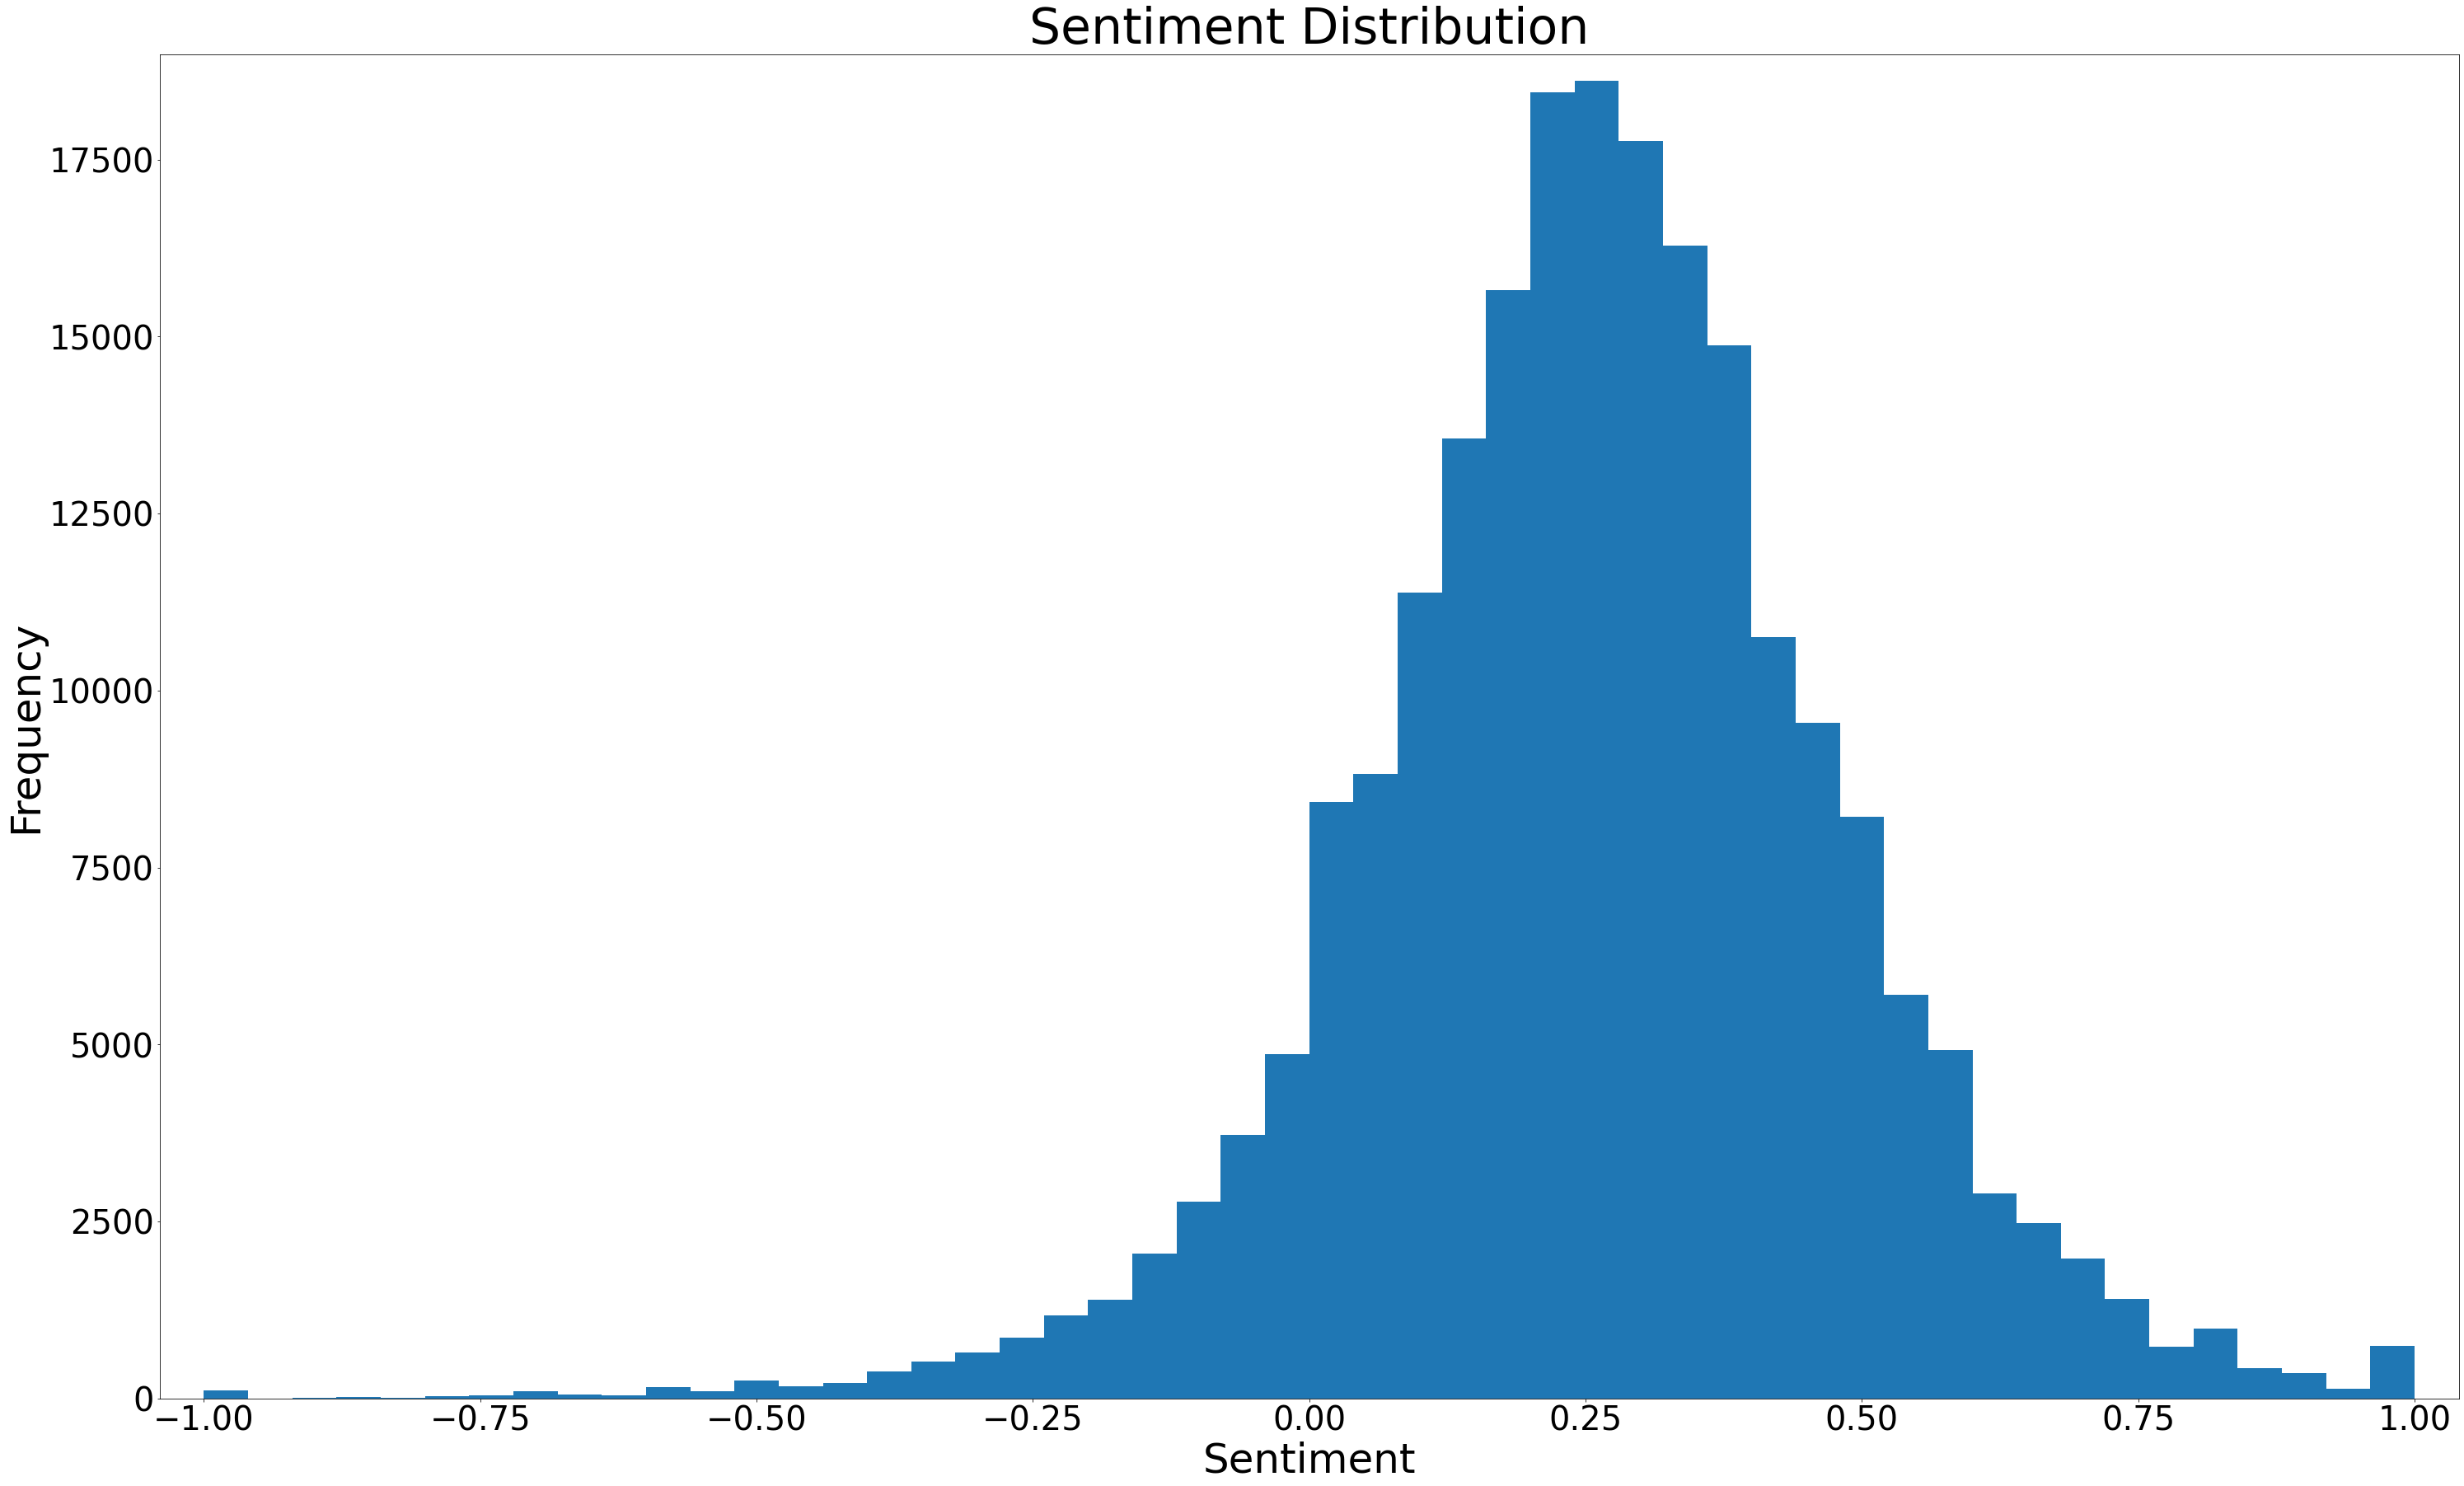

In [15]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(dfin['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [16]:
dsorted = dfin.sort_values(by='sentiment')
dsorted.head(5)

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,text_upr_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,sentiment
179642,179642,MEZcuC45_iOP7dXKN-3zbQ,qTror7qGHO3X_liEk57gmA,YES12b8B0afEx-SWv-o1nw,1,5,1,1,The business owner has unethical business prac...,2019-10-06 01:41:35,...,The business owner has unethical business prac...,"[The, business, owner, has, unethical, busines...","[the, business, owner, has, unethical, busines...","[the, business, owner, has, unethical, busines...","[business, owner, unethical, business, practic...","[(business, NN), (owner, NN), (unethical, JJ),...","[(business, n), (owner, n), (unethical, a), (b...","[business, owner, unethical, business, practic...",business owner unethical business practice tre...,-1.0
81248,81248,jgjRPUusARRrsm40-mXrOw,L33J8h182y_LgDjloobEfw,oz882XuZCxajKo64Opgq_Q,1,0,0,0,Lobster roll was awful. Service was terrible. ...,2016-03-26 17:44:31,...,Lobster roll was awful. Service was terrible. ...,"[Lobster, roll, was, awful, ., Service, was, t...","[lobster, roll, was, awful, ., service, was, t...","[lobster, roll, was, awful, service, was, terr...","[lobster, roll, awful, service, terrible, seaf...","[(lobster, NN), (roll, NN), (awful, JJ), (serv...","[(lobster, n), (roll, n), (awful, a), (service...","[lobster, roll, awful, service, terrible, seaf...",lobster roll awful service terrible seafood su...,-1.0
153876,153876,DhgRbGJYKn2KQZ4YoBEcPg,F4ygDNfkQdQiCLT8424KRA,yKvlRknp1Feues1rG-aJlg,1,0,0,0,"Awful service, disrespectful across the board....",2014-02-09 06:38:18,...,"Awful service, disrespectful across the board....","[Awful, service, ,, disrespectful, across, the...","[awful, service, ,, disrespectful, across, the...","[awful, service, disrespectful, across, the, b...","[awful, service, disrespectful, across, board,...","[(awful, JJ), (service, NN), (disrespectful, J...","[(awful, a), (service, n), (disrespectful, a),...","[awful, service, disrespectful, across, board,...",awful service disrespectful across board embar...,-1.0
168023,168023,AKYZNwf_1x3DwDNbJtCSRQ,I7BJbNp3OxrgfNzFh-OJJA,Tjgp7DWBwrgMrQE7_5ivZg,1,0,0,0,They brought me my check before they brought m...,2016-04-30 08:01:13,...,They brought me my check before they brought m...,"[They, brought, me, my, check, before, they, b...","[they, brought, me, my, check, before, they, b...","[they, brought, me, my, check, before, they, b...","[brought, check, brought, food, ...., hour, wa...","[(brought, VBN), (check, NN), (brought, VBD), ...","[(brought, v), (check, n), (brought, v), (food...","[bring, check, bring, food, ...., hour, wait, ...",bring check bring food .... hour wait horrible...,-1.0
114609,114609,5ZL3ZzmuFdtW5iYXPR92GQ,gGNQFyWlS-QTivvPYyfccw,UZUjgF7XW7WkvyUb8_qCiA,2,2,1,1,The only reason it gets two stars is the locat...,2015-03-01 23:28:39,...,The only reason it gets two stars is the locat...,"[The, only, reason, it, gets, two, stars, is, ...","[the, only, reason, it, gets, two, stars, is, ...","[the, only, reason, it, gets, two, stars, is, ...","[reason, gets, two, stars, location, sit, bar,...","[(reason, NN), (gets, VBZ), (two, CD), (stars,...","[(reason, n), (gets, v), (two, n), (stars, n),...","[reason, get, two, star, location, sit, bar, s...",reason get two star location sit bar service t...,-1.0


In [17]:
dsent = dfin.drop(['text_upr_str', 'tokenized', 'lower', 'no_punc', 'stopwords_removed', 'pos_tags', 'wordnet_pos'], axis = 1)

In [18]:
display(dsent)

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,Ambience_casual,BP_garage,BP_street,BP_validated,BP_lot,BP_valet,text_upr,lemmatized,lemma_str,sentiment
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,...,False,False,False,False,True,False,"[I, have, been, here, twice, and, have, had, r...","[twice, really, good, food, service, time, get...",twice really good food service time get burger...,0.182259
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,...,True,False,False,False,False,True,"[Quickly, stopped, in, for, a, UFC, fight., I,...","[quickly, stop, ufc, fight, sit, bar, boyfrien...",quickly stop ufc fight sit bar boyfriend park ...,0.288889
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,...,True,False,False,False,True,False,"[I, think, their, rice, dishes, are, way, bett...","[think, rice, dish, way, well, pho, 's, also, ...",think rice dish way well pho 's also really li...,0.350000
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,...,False,False,False,False,True,False,"[When, we, first, arrived, at, the, Coco, Key,...","[first, arrive, coco, key, greet, number, staf...",first arrive coco key greet number staff membe...,-0.071723
4,4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,...,True,False,True,False,True,False,"[3.5, stars!, I, got, the, avocado, margarita,...","[3.5, star, get, avocado, margarita, delicious...",3.5 star get avocado margarita delicious custo...,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214869,214869,Mc6gBUoqj8VNyGHBOTIPCw,_XXa8CyI4uKOdu6RRbWE4g,cs6HfZNykLVitm09jWFqWg,4,5,3,4,I went here for brunch with 2 friends on a Sun...,2018-04-17 00:28:02,...,True,False,True,False,False,True,"[I, went, here, for, brunch, with, 2, friends,...","[go, brunch, 2, friend, sunday, awhile, back, ...",go brunch 2 friend sunday awhile back buffet s...,0.500000
214870,214870,jDMk2EEGG-fkuA2rnCr0zg,KTgetFhipsOG1vWfVuSaiA,cs6HfZNykLVitm09jWFqWg,5,0,0,0,Our group shared dinner entrees and side dishe...,2017-10-13 21:02:12,...,True,False,True,False,False,True,"[Our, group, shared, dinner, entrees, and, sid...","[group, share, dinner, entree, side, dish, bes...",group share dinner entree side dish best food ...,0.125000
214871,214871,MbmrN5q_JKkokjOdqLXxhQ,SF2Hu55kX9QJDvZETuZ9eg,uXOVFQraz1va1TrtgiqYTg,4,0,0,0,This was a fun place to dine. It is a one chef...,2016-10-31 20:47:16,...,True,False,True,False,False,False,"[This, was, a, fun, place, to, dine., It, is, ...","[fun, place, dine, one, chef, kitchen, wait, 1...",fun place dine one chef kitchen wait 1 hr get ...,0.362500
214872,214872,2n2PbNLYlQSRs88VrZtrGg,_BwuIa1-qjIL1PdYB_awyA,Gzo1G_mMc2kpduvK2yQFYg,2,0,0,0,The food was ok. I order the pork bites and it...,2015-07-21 13:21:59,...,True,False,False,False,True,False,"[The, food, was, ok., I, order, the, pork, bit...","[food, ok, order, pork, bite, good, wife, orde...",food ok order pork bite good wife order combin...,-0.051852


In [19]:
#New dataset with sentiment for final analysis

dsent.to_csv('dsent.csv')

In [20]:
dsent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214874 entries, 0 to 214873
Data columns (total 92 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Unnamed: 0                             214874 non-null  int64  
 1   review_id                              214874 non-null  object 
 2   user_id                                214874 non-null  object 
 3   business_id                            214874 non-null  object 
 4   stars_x                                214874 non-null  int64  
 5   useful_x                               214874 non-null  int64  
 6   funny_x                                214874 non-null  int64  
 7   cool_x                                 214874 non-null  int64  
 8   text                                   214874 non-null  object 
 9   date                                   214874 non-null  object 
 10  attributes.RestaurantsDelivery         214874 non-null  